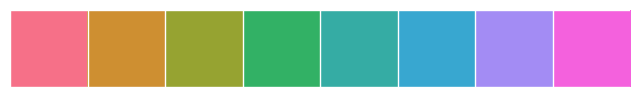

In [2]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))

In [3]:
# data for 4-12 Jan
urban=pd.read_csv('/Users/stella/Desktop/data/1329_PEGASOR A_20170112182452_v2.csv',delimiter=',')
indoor=pd.read_csv('/Users/stella/Desktop/data/realeco_sn0135-ldsa_2017-01-05t060000_2017-01-12t160500.csv',delimiter=';')

In [4]:
print(urban.columns)
print()
print(indoor.columns)

Index(['DateTime', 'MEASURE_PA_LABEL', 'MEASURE_MG_LABEL', 'MEASURE_N_LABEL',
       'PAMBT_LABEL', 'PAMBRHUM_LABEL', 'ZEROLEVEL_LABEL', 'CORONAI_LABEL',
       'CORONAU_LABEL', 'PCORSTAB_LABEL', 'PCORSTABM_LABEL', 'TRAPU_LABEL',
       'PROCTEMP_LABEL', 'STEMP_LABEL', 'INLETTEMP_LABEL', 'ELECINTTEMP_LABEL',
       'PFILPRESS_LABEL', 'PSYSPRESS_LABEL', 'PCHASFANRPM_LABEL', 'ENCLOSTEMP',
       'MEASURE_PA_LABEL.1', 'MEASURE_MG_LABEL.1', 'MEASURE_N_LABEL.1',
       'PAMBT_LABEL.1', 'PAMBRHUM_LABEL.1', 'ZEROLEVEL_LABEL.1',
       'CORONAI_LABEL.1', 'CORONAU_LABEL.1', 'PCORSTAB_LABEL.1',
       'PCORSTABM_LABEL.1', 'TRAPU_LABEL.1', 'PROCTEMP_LABEL.1',
       'STEMP_LABEL.1', 'INLETTEMP_LABEL.1', 'ELECINTTEMP_LABEL.1',
       'PFILPRESS_LABEL.1', 'PSYSPRESS_LABEL.1', 'PCHASFANRPM_LABEL.1',
       'MEASURE_PA_LABEL.2', 'MEASURE_MG_LABEL.2', 'MEASURE_N_LABEL.2',
       'PAMBT_LABEL.2', 'PAMBRHUM_LABEL.2', 'ZEROLEVEL_LABEL.2',
       'CORONAI_LABEL.2', 'CORONAU_LABEL.2', 'PCORSTAB_LABEL.2',
 

In [5]:
date=urban['DateTime']
ldsa1=urban['MEASURE_PA_LABEL']
ldsa2=urban['MEASURE_PA_LABEL.1']
ldsa3=urban['MEASURE_PA_LABEL.2']

In [6]:
date=date.apply(lambda x: parse(x))
urban=pd.concat([date,ldsa1,ldsa2,ldsa3],axis=1)

In [7]:
date[0]

Timestamp('2017-01-05 00:00:00')

In [8]:
indoor['time']=indoor['time'].apply(lambda x: parse(x))
dt=timedelta(hours=5)
indoor.time=indoor.time-dt

In [9]:
# delete <=0
# delete before 5 Jan 1AM

In [10]:
r1=datetime.datetime(2017,1,5,1)
r2=datetime.datetime(2017,1,12,11)

In [11]:
u_data=urban.set_index('DateTime')
i_data=indoor.set_index('time')

In [12]:
#test0=df1.ix[r0_1:r0_2].reset_index()
udata=u_data.ix[r1:r2].reset_index()
idata=i_data.ix[r1:r2].reset_index()

In [13]:
udata.tail()

,DateTime,MEASURE_PA_LABEL,MEASURE_PA_LABEL.1,MEASURE_PA_LABEL.2
10385,2017-01-12 10:56:00,25.804,22.702,23.764
10386,2017-01-12 10:57:00,24.284,23.073,24.696
10387,2017-01-12 10:58:00,24.284,23.073,24.696
10388,2017-01-12 10:59:00,24.284,22.114,22.993
10389,2017-01-12 11:00:00,24.284,22.114,22.993


In [14]:
idata.tail()

,time,value
10669,2017-01-12 10:56:00,16.6
10670,2017-01-12 10:57:00,16.2
10671,2017-01-12 10:58:00,15.9
10672,2017-01-12 10:59:00,15.5
10673,2017-01-12 11:00:00,15.5


(0, 130)

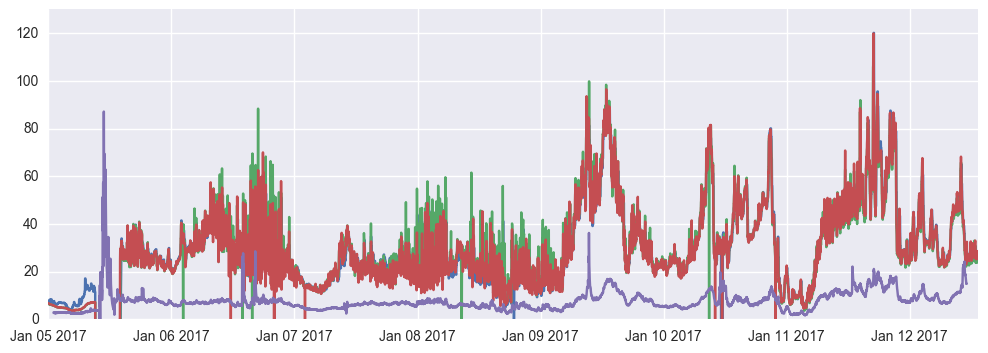

In [15]:
plt.figure(figsize=(12,4))
plt.plot(date,ldsa1)
plt.plot(date,ldsa2)
plt.plot(date,ldsa3)
plt.plot(indoor.time,indoor.value)
plt.ylim([0,130])

In [16]:
udata=udata[udata['MEASURE_PA_LABEL']>0]
udata=udata[udata['MEASURE_PA_LABEL.1']>0]
udata=udata[udata['MEASURE_PA_LABEL.2']>0]

(0, 130)

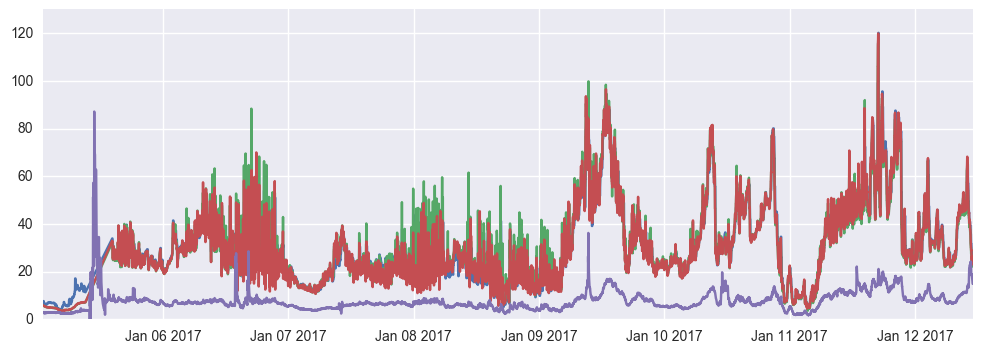

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL'])
plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL.1'])
plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL.2'])
plt.plot(indoor.time,indoor.value)
plt.ylim([0,130])

(0, 130)

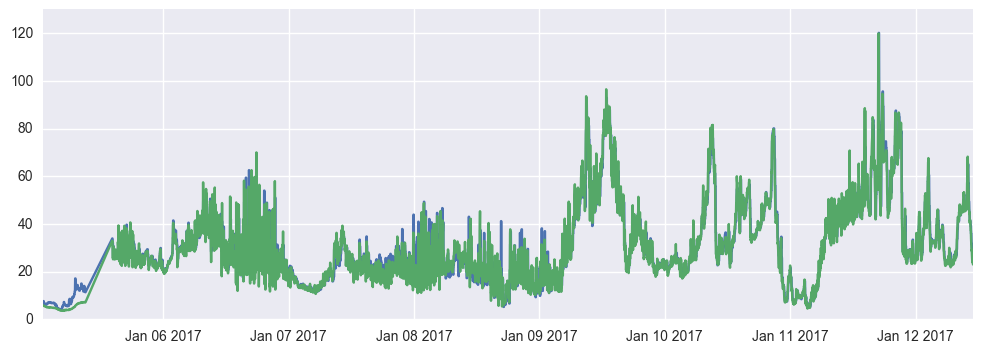

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL'])
#plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL.1'])
plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL.2'])
#plt.plot(indoor.time,indoor.value)
plt.ylim([0,130])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL'])
plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL.1'])
#plt.plot(udata['DateTime'],udata['MEASURE_PA_LABEL.2'])
#plt.plot(indoor.time,indoor.value)
plt.ylim([0,130])

(0, 130)

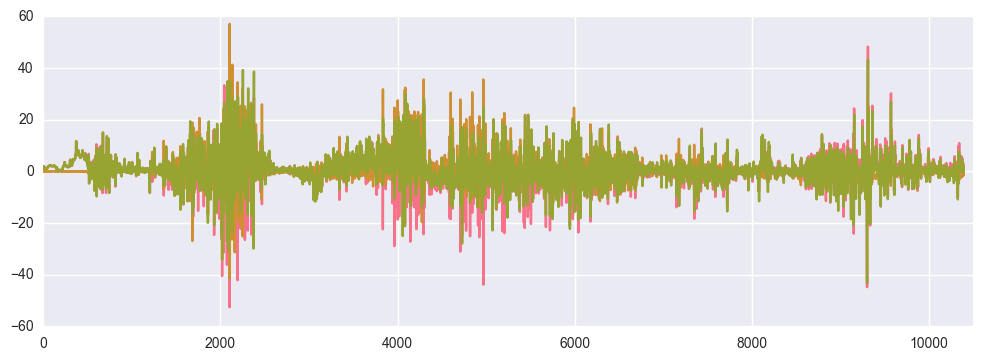

In [19]:
plt.figure(figsize=(12,4))
plt.xlim([0,10500])
plt.plot(udata['MEASURE_PA_LABEL']-udata['MEASURE_PA_LABEL.1'],color=colorz[0])
plt.plot(udata['MEASURE_PA_LABEL.1']-udata['MEASURE_PA_LABEL.2'],color=colorz[1])
plt.plot(udata['MEASURE_PA_LABEL']-udata['MEASURE_PA_LABEL.2'],color=colorz[2])

In [20]:
delta1=udata['MEASURE_PA_LABEL']-udata['MEASURE_PA_LABEL.1']
delta2=udata['MEASURE_PA_LABEL.1']-udata['MEASURE_PA_LABEL.2']
delta3=udata['MEASURE_PA_LABEL']-udata['MEASURE_PA_LABEL.2']

In [21]:
print(max(delta1),min(delta1))
print(max(delta2),min(delta2))
print(max(delta3),min(delta3))

48.26 -52.631
57.053 -41.355
43.143 -43.364


In [50]:
# data from EPA 1/4 - 1/23 noon
epa_queens=pd.read_excel('/Users/stella/Desktop/data/Queens Data_010417_012317.xls')[3:28084]

In [51]:
epa_queens.head()

,SiteReport - Site Queens College Report : TimeBeginning,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
3,1/4/2017 12:00 AM,2.21,1.74,0.1,3.89,18400
4,1/4/2017 12:01 AM,2.21,1.74,0.1,3.89,17450
5,1/4/2017 12:02 AM,2.21,1.74,0.1,3.89,16950
6,1/4/2017 12:03 AM,2.33,1.85,-0.29,4.03,17050
7,1/4/2017 12:04 AM,2.42,1.92,-0.56,4.12,16600


In [52]:
epa_queens=epa_queens.rename(index=str, columns={
                                      "SiteReport - Site Queens College Report : TimeBeginning": "Datetime",
                                      "Unnamed: 1": "PM2.5_MC (ug/m3)",
                                      "Unnamed: 2": "PM2.5_FEM_MC (ug/m3)",
                                      "Unnamed: 3": "PM2.5_Ref_Mass (ug/m3)",
                                      "Unnamed: 4": "PM10_MC (ug/m3)",
                                      "Unnamed: 5": "Ultrafine (#/cm3)"})

In [55]:
epa_queens.head()

,Datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_Ref_Mass (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3)
3,1/4/2017 12:00 AM,2.21,1.74,0.1,3.89,18400
4,1/4/2017 12:01 AM,2.21,1.74,0.1,3.89,17450
5,1/4/2017 12:02 AM,2.21,1.74,0.1,3.89,16950
6,1/4/2017 12:03 AM,2.33,1.85,-0.29,4.03,17050
7,1/4/2017 12:04 AM,2.42,1.92,-0.56,4.12,16600


In [83]:
aqu=pd.read_csv('/Users/stella/Desktop/data/1329_PEGASOR A_20170206150115.csv')

In [84]:
aqu.head()

,DateTime,MEASURE_PA_LABEL,MEASURE_MG_LABEL,MEASURE_N_LABEL,MEASURE_PA_LABEL.1,MEASURE_MG_LABEL.1,MEASURE_N_LABEL.1,MEASURE_PA_LABEL.2,MEASURE_MG_LABEL.2,MEASURE_N_LABEL.2
0,1/4/17 15:02,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191
1,1/4/17 15:03,4.499,3684.353,0.177,4.595,3346.061,0.161,4.712,3913.317,0.188
2,1/4/17 15:04,4.666,3820.196,0.183,4.595,3346.061,0.161,4.712,3913.317,0.188
3,1/4/17 15:05,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178
4,1/4/17 15:06,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178


In [67]:
epa_queens['Datetime']=epa_queens['Datetime'].apply(lambda x: parse(x))

In [85]:
aqu['DateTime']=aqu['DateTime'].apply(lambda x: parse(x))

In [86]:
aqu=aqu.rename(index=str, columns={ "MEASURE_PA_LABEL":"ldsa",
                                    "MEASURE_MG_LABEL":"num",
                                    "MEASURE_N_LABEL":"pm25",
                                           
                                    "MEASURE_PA_LABEL.1":"ldsa-1",
                                    "MEASURE_MG_LABEL.1":"num-1",
                                    "MEASURE_N_LABEL.1":"pm25-1",
                                           
                                    "MEASURE_PA_LABEL.2":"ldsa-2",
                                    "MEASURE_MG_LABEL.2":"num-2",
                                    "MEASURE_N_LABEL.2":"pm25-2",})

In [93]:
aqi=pd.read_excel('/Users/stella/Desktop/data/pm25-aqi-jan4-jan23.xlsx',sheetname=1)

In [95]:
aqi.head()

,time,value (µg/m³)
0,2017-01-03 23:59:00,1.764067
1,2017-01-04 00:00:00,1.756807
2,2017-01-04 00:01:00,1.714769
3,2017-01-04 00:02:00,1.708551
4,2017-01-04 00:03:00,1.751536


In [96]:
aqu.head()

,DateTime,ldsa,num,pm25,ldsa-1,num-1,pm25-1,ldsa-2,num-2,pm25-2
0,2017-01-04 15:02:00,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191
1,2017-01-04 15:03:00,4.499,3684.353,0.177,4.595,3346.061,0.161,4.712,3913.317,0.188
2,2017-01-04 15:04:00,4.666,3820.196,0.183,4.595,3346.061,0.161,4.712,3913.317,0.188
3,2017-01-04 15:05:00,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178
4,2017-01-04 15:06:00,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178


In [97]:
epa_queens.head()

,Datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_Ref_Mass (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3)
3,2017-01-04 00:00:00,2.21,1.74,0.1,3.89,18400
4,2017-01-04 00:01:00,2.21,1.74,0.1,3.89,17450
5,2017-01-04 00:02:00,2.21,1.74,0.1,3.89,16950
6,2017-01-04 00:03:00,2.33,1.85,-0.29,4.03,17050
7,2017-01-04 00:04:00,2.42,1.92,-0.56,4.12,16600


In [98]:
aq=aqi.copy(False);aqq=aqu.copy(False)

In [108]:
del aqq['num-1']
del aqq['pm25-1']
del aqq['ldsa-2']
del aqq['num-2']
del aqq['pm25-2']

In [112]:
del aqq['ldsa']

In [117]:
aq=aq.set_index('time')
aqq=aqq.set_index('DateTime')

In [120]:
aqq.head()

,pm25
DateTime,
2017-01-04 15:02:00,0.177
2017-01-04 15:03:00,0.177
2017-01-04 15:04:00,0.183
2017-01-04 15:05:00,0.183
2017-01-04 15:06:00,0.183


In [121]:
aq1=aq.join(aqq)

In [133]:
aq1=aq1.reset_index()

In [138]:
aq1=aq1[np.isnan(aq1['pm25'])==False]

In [139]:
aq1=aq1.reset_index()

In [141]:
del aq1['level_0']

In [142]:
aq1

,index,value (µg/m³),pm25
0,2017-01-04 15:02:00,3.003132,0.177
1,2017-01-04 15:03:00,2.951012,0.177
2,2017-01-04 15:04:00,2.924203,0.183
3,2017-01-04 15:05:00,3.083743,0.183
4,2017-01-04 15:06:00,3.124721,0.183
5,2017-01-04 15:07:00,3.127570,0.183
6,2017-01-04 15:08:00,3.034455,0.183
7,2017-01-04 15:09:00,3.108113,0.175
8,2017-01-04 15:10:00,2.857675,0.175
9,2017-01-04 15:11:00,2.814080,0.175
